# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса по продаже недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и ряде соседних населённых пунктов за несколько лет. Ваша задача — установить параметры для определения рыночной стоимости объектов недвижимости. Конечная цель Заказчика - на основе полученных от вас результатов, построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

## Описание исходных данных:

*       airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* 		balcony — число балконов
* 		ceiling_height — высота потолков (м)
* 		cityCenters_nearest — расстояние до центра города (м)
* 		days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* 		first_day_exposition — дата публикации
* 		floor — этаж
* 		floors_total — всего этажей в доме
* 		is_apartment — апартаменты (булев тип)
* 		kitchen_area — площадь кухни в квадратных метрах (м²)
* 		last_price — цена на момент снятия с публикации
* 		living_area — жилая площадь в квадратных метрах(м²)
* 		locality_name — название населённого пункта
* 		open_plan — свободная планировка (булев тип)
* 		parks_around3000 — число парков в радиусе 3 км
* 		parks_nearest — расстояние до ближайшего парка (м)
* 		ponds_around3000 — число водоёмов в радиусе 3 км
* 		ponds_nearest — расстояние до ближайшего водоёма (м)
* 		rooms — число комнат
* 		studio — квартира-студия (булев тип)
* 		total_area — площадь квартиры в квадратных метрах (м²)
* 		total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.


## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

#Читаем файл
realty_data = pd.read_csv('/datasets/real_estate_data.csv')
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


In [2]:
realty_data.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Наблюдаем разделитель в виде символа табуляции "\t". Разделим столбцы и вновь проанализируем файл.

In [3]:
realty_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
realty_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Изучение файла. Вывод

Исходный файл содержит 22 столбца и 23 699 строк.

В целом названия столбцов информативны. Можно оставить без изменений.

Пропущенные значения наблюдаются в 14 из 22 столбцов. С этим необходимо будет разобраться более детально.

Не все данные имеют необходимый для удобочитаемости и расчетов тип:

- `first_day_exposition` - имеет тип `object`, необходимо привести к типу `datetime`формата день-месяц-год
- `floors_total` - имеет тип `float`, целесообразно привести к типу `int`
- `balcony` - имеет тип `float`, целесообразно привести к типу `int`
- `parks_around3000` - имеет тип `float`, целесообразно привести к типу `int`
- `parks_nearest` - имеет тип `float`, целесообразно привести к типу `int`
- `ponds_around3000` - имеет тип `float`, целесообразно привести к типу `int`
- `ponds_nearest` - имеет тип `float`, целесообразно привести к типу `int`
- `days_exposition` - имеет тип `float`, целесообразно привести к типу `int`
- `last_price` - имеет тип `float`, целесообразно привести к типу `int`
- `airports_nearest` - имеет тип `float`, целесообразно привести к типу `int`
- `city_сenters_nearest` - имеет тип `float`, целесообразно привести к типу `int`

## Шаг 2. Предобработка данных

Проработаем каждый столбец, имеющий пропуски.

Общая информация о пропусках:

In [5]:
realty_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Идем по порядку:

#### Столбец `ceiling_height`

В столбце внушительное число пустых значений, а учитывая, что высота потолков достаточно весомый параметр при оценке недвижимости - просто игнорировать эти строки мы не можем. Отсутствие значений, возможно, объясняется тем, что этот параметр не являлся обязательным при заполнении объявления (и если это так, то стоит дать заказчику рекомендацию изменить это поле в форме на "обязательное").
С учетом того, что в нашей стране достаточно типовая застройка  - имеет смысл заменить пропуски медианным значением.

In [6]:
realty_data['ceiling_height'] = realty_data['ceiling_height'].fillna(realty_data['ceiling_height'].median())

Переходим к столбцу `floors_total`

Так как количество пропусков незначительно (всего 86) - заменяем на медианные значения.

In [7]:
realty_data['floors_total'] = realty_data['floors_total'].fillna(realty_data['floors_total'].median())

#### Столбец  `living_area`

Очень странно, что есть отсутствующие значения в столь важном параметре недвижимости...Такой пункт обязан быть обязательным при составлении объявления. Терять такие данные нельзя. Оптимальным вариантом видится следующее - заменим пустые значения на медианные значениями площади отдельных групп (по количеству комнат) столбца `rooms`.

Сначала построим таблицу с этими значениями:

In [8]:
area_median_by_rooms = pd.pivot_table(realty_data, index = 'rooms', values = 'living_area', aggfunc = 'median')
area_median_by_rooms

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


Создадим функцию для заполнения пустых значений площади соответствующими медианными значениями по количеству комнат:

In [9]:
def mediana_for_none_area(row):
    return area_median_by_rooms.loc[row['rooms']]['living_area']

Заполним отсутствующие значения площади с помощью вышесозданной функции

In [10]:
realty_data.loc[realty_data['living_area'].isnull(), 'living_area'] = realty_data.apply(mediana_for_none_area, axis = 1)

Проверим остались ли пропуски:

In [11]:
realty_data['living_area'].isnull().sum()

0

Отлично.

#### Столбец  `is_apartment`.

В нем наибольшее количество пропусков. Возможно, что у нашего населения, в силу национальных и исторических особенностей, нет четкого понимания определения такого типа недвижимости как "аппартаменты". В обиходе это понятие появилось сравнительно недавно, поэтому человеку не знакомому с определением проще было проигнорировать этот пункт. 

Посмотрим повнимательнее.

In [12]:
realty_data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Доля аппартаментов в имеющихся данных менее 2%... Меняем отсутствующие значения на False, так как фактически ничего потеряем из за этого.

In [13]:
realty_data['is_apartment'] = realty_data['is_apartment'].fillna(False)

#### Столбец  `kitchen_area`.

In [14]:
# Проводим первичный анализ данных
realty_data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Средняя площадь кухни вполне соответствует реалиям. Но, что с пропусками? Может пропуски соответствуют студиям (кол-во комнат = 0), где кухня как таковая отсутствует? Проверим.

In [15]:
realty_data.query('rooms == 0')['kitchen_area'].isnull().sum()

197

Увы. Лишь малая часть пропусков по площади кухни принадлежит студиям. Значит заменим пропуски медианой площади кухни.

In [16]:
realty_data['kitchen_area'] = realty_data['kitchen_area'].fillna(realty_data['kitchen_area'].median())

Проверим пропуски:

In [17]:
realty_data['kitchen_area'].isnull().sum()

0

#### Столбец  `balcony`

In [18]:
realty_data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [19]:
realty_data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [20]:
realty_data['balcony'].isnull().sum()

11519

Отсутствие указаний о количестве балконов в почти что половине объявлений вряд ли может объясняться тем что это, например, одноэтажные дома (уж очень их в таком случае много). Скорее всего человек опять таки поленился заполнить этот пункт. Заменим пропуски на медиану, тем более что в рамках поставленных перед нами задач этот параметр недвижимости не столь важен.

In [21]:
realty_data['balcony'] = realty_data['balcony'].fillna(realty_data['balcony'].median())

Проверим пропуски:

In [22]:
realty_data['balcony'].isnull().sum()

0

С балконами разобрались.

#### Столбец  `locality_name`.

Оценим данные.

In [23]:
realty_data['locality_name'].isnull().sum()

49

Имеем 49 пропусков. Немного. И восстановить их значения у нас нет возможности. Поэтому соберем их в группу `Другие локации` и сконцентрируемся на анализе заполненных значений.

In [24]:
realty_data['locality_name'] = realty_data['locality_name'].fillna('Другие локации')

In [25]:
realty_data['locality_name'].sort_values().unique().tolist()

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Другие локации',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдо

Бросается в глаза нестабильность написания слова "поселок" (через "е" и "ё"). Приведем к единообразию.

In [26]:
realty_data['locality_name'] = realty_data['locality_name'].str.replace('посёлок', 'поселок', regex = True)

Проверяем успешность замены

In [27]:
realty_data['locality_name'].sort_values().unique().tolist()

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Другие локации',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Фёдоровское',
 'городской поселок 

Проверим на пропуски еще раз.

In [28]:
realty_data['locality_name'].isnull().sum()

0

С названиями населенных пунктов закончили.

#### Столбец  `airports_nearest`

In [29]:
# Количество пропусков
realty_data['airports_nearest'].isnull().sum()

5542

Прилично. Посмотрим к каким населенным пунктам относятся пропуски.

In [30]:
realty_data.query('airports_nearest.isnull()')['locality_name'].sort_values().unique().tolist()

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Другие локации',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Фёдоровское',
 'городской поселок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 

Вполне логично - большинство населенных пунктов, без указания расстояния до аэропорта, это деревни и поселки. Но Питер тоже встречается. Поступим следующим образом - заменим пропуски медианными значениями по соответствующим городам.

In [31]:
# Строим таблицу соответствующих медиан
median_for_airports = pd.pivot_table(realty_data, index = 'locality_name', values = 'airports_nearest', aggfunc = 'median')
median_for_airports

,airports_nearest
locality_name,
Другие локации,22041.0
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25715.5
Кронштадт,67850.0
Ломоносов,48415.5
Павловск,20529.5
Петергоф,39231.0
Пушкин,15766.0


In [32]:
# Сохраняем список населенных пунктов по которым известны медианы
airports_median_localities = list(median_for_airports.index)

# Создаем функцию для подстановки медиан в пропуски
def mediana_for_none_airports(row):
    locality = row['locality_name']
    if locality in airports_median_localities:
        return median_for_airports.loc[row['locality_name']]['airports_nearest']

# Осуществляем подстановку медиан
realty_data.loc[realty_data['airports_nearest'].isnull(), 'airports_nearest'] = realty_data.apply(mediana_for_none_airports, axis = 1)

Проверим количество пропусков в `airports_nearest` после подстановки медиан

In [33]:
realty_data['airports_nearest'].isnull().sum()

4864

Удалось сократить число пропусков с 5 542 до 4 864. Остальные пропуски видимо принадлежат совсем небольшим поселениям. За неимением доп. информации заменим их на 0.

In [34]:
realty_data['airports_nearest'] = realty_data['airports_nearest'].fillna(0)

Контрольная проверка пропусков в столбце `airports_nearest`:

In [35]:
realty_data['airports_nearest'].isnull().sum()

0

#### Столбец  `cityCenters_nearest`

In [36]:
# Количество пропусков
realty_data['cityCenters_nearest'].isnull().sum()

5519

Много. Поступим так же как с пропусками в `airports_nearest`, заменив, по возможности медианными значениями соответствующих городов.

In [37]:
# Строим таблицу соответствующих медиан
median_for_cityCenters = pd.pivot_table(realty_data, index = 'locality_name', values = 'cityCenters_nearest', aggfunc = 'median')
median_for_cityCenters

,cityCenters_nearest
locality_name,
Другие локации,8943.0
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29140.5
Кронштадт,49575.0
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5


In [38]:
# Сохраняем список населенных пунктов по которым известны медианы
cityCenters_median_localities = list(median_for_cityCenters.index)

# Создаем функцию для подстановки медиан в пропуски
def mediana_for_none_cityCenters(row):
    locality = row['locality_name']
    if locality in cityCenters_median_localities:
        return median_for_cityCenters.loc[row['locality_name']]['cityCenters_nearest']

# Осуществляем подстановку медиан
realty_data.loc[realty_data['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = realty_data.apply(mediana_for_none_cityCenters, axis = 1)

Проверим количество пропусков в `cityCenters_nearest` после подстановки медиан

In [39]:
realty_data['cityCenters_nearest'].isnull().sum()

4864

Оставшиеся пропуски меняем на 0

In [40]:
realty_data['cityCenters_nearest'] = realty_data['cityCenters_nearest'].fillna(0)

Контрольная проверка

In [41]:
realty_data['cityCenters_nearest'].isnull().sum()

0

#### Столбцы  `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`

In [42]:
realty_data['parks_around3000'].isnull().sum()

5518

Достаточно много. Но в рамках стоящих перед нами задач этот параметр не является первостепенным. Поэтому можно заменить простой медианой.

In [43]:
realty_data['parks_around3000'] = realty_data['parks_around3000'].fillna(realty_data['parks_around3000'].median())

Аналогичным образом заменим пропуски в столбцах `parks_nearest`, `ponds_around3000`, `ponds_nearest` простой медианой, в силу того, что эти данные в рамках текущего проекта не критичны.

In [44]:
realty_data['parks_nearest'] = realty_data['parks_nearest'].fillna(realty_data['parks_nearest'].median())
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].fillna(realty_data['ponds_around3000'].median())
realty_data['ponds_nearest'] = realty_data['ponds_nearest'].fillna(realty_data['ponds_nearest'].median())

Проверим наличие пропусков после замены:

In [45]:
realty_data[['parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].isnull().sum()

parks_around3000    0
parks_nearest       0
ponds_around3000    0
ponds_nearest       0
dtype: int64

#### Столбец  `days_exposition`

In [46]:
realty_data['days_exposition'].isnull().sum()

3181

В этом случае наличие такого числа пропусков достаточно странно. Ведь разработчики портала недвижимости на своей стороне определенно могут определить когда именно было создано объявление...Учитывая невозможность обратной связи заменим пропуски медианой ( и не забудем в дальнейшем указать на вышеуказанную недоработку заказчику).

In [47]:
realty_data['days_exposition'] = realty_data['days_exposition'].fillna(realty_data['days_exposition'].median())

# Проверим пропуски после замены
realty_data['days_exposition'].isnull().sum()

0

С пропусками в столбцах закончили. Сделаем финальную проверку.

In [48]:
realty_data.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

### Обработка пропусков. Выводы.

В результате работ по устранению пропусков можно отметить следующее:

- исходные данные приведены в достаточно "грязном" виде. А именно - много пропусков в критически важных как для текущего проекта, так и общей деятельности портала недвижимости, категориях данных (площадь квартиры, дата публикации и т.д.)
- в дальнейшем разработчикам имеет смысл сделать важные для аналитики поля обязательными при заполнении объявления
- немного поправили, для удобочитаемости, **locality_name** (привели к одному варианту слово "поселок")
- в столбцах **days_exposition, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, balcony, kitchen_area** заменили пропуски медианой
- в **cityCenters_nearest, airports_nearest** пропуски заменены уникальными медианными значениями для каждого города. Но стоит отметить, что большое количество пропусков в этих столбцах не удалось заменить, в силу полного отсутствия данных по отдельным городам. Это необходимо учитывать при дальнейшем анализе  и расчетах.



### 2.1 Изменение типов данных

In [49]:
# Изменим тип данных first_day_exposition с str на Datetime:
realty_data['first_day_exposition'] = pd.to_datetime(realty_data["first_day_exposition"], format='%Y-%m-%d')

#Меняем тип данных в столбцах, где данные удобно и целесообразно читать и рассчитывать в целочисленном формате, с float на int:
realty_data['last_price'] = realty_data['last_price'].astype('int')
realty_data['floors_total'] = realty_data['floors_total'].astype('int')
realty_data['balcony'] = realty_data['balcony'].astype('int')
realty_data['parks_around3000'] = realty_data['parks_around3000'].astype('int')
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].astype('int')
realty_data['days_exposition'] = realty_data['days_exposition'].astype('int')
realty_data['airports_nearest'] = realty_data['airports_nearest'].astype('int')
realty_data['cityCenters_nearest'] = realty_data['cityCenters_nearest'].astype('int')
realty_data['parks_nearest'] = realty_data['parks_nearest'].astype('int')
realty_data['ponds_nearest'] = realty_data['ponds_nearest'].astype('int')

#При выполнении арифметических операций со столбцами float большое количество цифр после знака неудобно для восприятия. Изменим:
pd.options.display.float_format = '{:,.1f}'.format


Финальная проверка данных:

In [50]:
realty_data.info()
realty_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,1,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,11.0,2,поселок Шушары,12817,18603,0,455,0,502,81
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.6,14,45.0,9,False,...,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,41.0,1,Санкт-Петербург,31856,8098,2,112,1,48,121


### Изменение типов данных. Выводы.

В ряде случаев данные заведены в нецелесообразных типах, не очень удобных для восприятия и арифметических операций. Либо мы просто не знаем другие задачи, стоящие перед Заказчиком, в рамках которых исходные типы данных востребованы и необходимы...

 - **first_day_exposition** - тип данных изменен с str на Datetime
 - **last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition, airports_nearest, city_сenters_nearest, parks_nearest, ponds_nearest** - - тип данных изменен с float на int
 - для удобочитаемости округлили представление типа float до 1 знака после запятой
 

### 2.2 Обработка дубликатов

Оценим количество дубликатов в файле:

In [51]:
realty_data.duplicated().sum()

0

### Обработка дубликатов. Выводы.

Дубликаты отсутствуют. Все строки уникальны.

Можно приступать к расчетам.

## Шаг 3. Посчитайте и добавьте в таблицу

* 		цену квадратного метра;
* 		день недели, месяц и год публикации объявления;
* 		этаж квартиры; варианты — первый, последний, другой;
* 		соотношение жилой и общей площади, а также отношение площади кухни к общей.



### Цена квадратного метра


In [52]:
realty_data['sqm_price'] = realty_data['last_price'] / realty_data['total_area']

### День недели, месяц и год публикации объявления

In [53]:
# День
realty_data['exposition_weekday'] = realty_data['first_day_exposition'].dt.weekday
# Месяц
realty_data['exposition_month'] = realty_data['first_day_exposition'].dt.month
# Год
realty_data['exposition_year'] = realty_data['first_day_exposition'].dt.year

### Этаж квартиры: первый, последний, другой.

Проведем категоризацию согласно указанным условиям:

In [54]:
# Напишем функцию для категоризации
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# Проведем категоризацию и запишем значения в новый столец
realty_data.loc[:, 'floor_type'] = realty_data.apply(floor_category, axis = 1)

Проверим успешность категоризации:

In [55]:
realty_data['floor_type'].value_counts()

другой       17441
последний     3341
первый        2917
Name: floor_type, dtype: int64

### Cоотношение жилой и общей площади, а также отношение площади кухни к общей.


In [56]:
# Cоотношение жилой и общей площади
realty_data['living_per_total_area'] = realty_data['living_area'] / realty_data['total_area']

# Cоотношение площади кухни к общей площади
realty_data['kitchen_per_total_area'] = realty_data['kitchen_area'] / realty_data['total_area']

### Шаг 3. Посчитайте и добавьте в таблицу. Выводы.

Рассчитаны и добавлены в таблицу:

- `sqm_price` - цена квадратного метра;
- `exposition_weekday`, `exposition_month`, `exposition_year` - день недели, месяц и год публикации объявления;
- `living_per_total_area`, `kitchen_per_total_area` - соотношение жилой и общей площади, а также отношение площади кухни к общей;
- произведена категоризация столбца `floor` (этаж квартиры), в соответствии с поставленными условиям: варианты — первый, последний, другой;



## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

* 		Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* 		Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* 		Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* 		Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* 		Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
* 		Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
* 		Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

### 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков.

#### Площадь

Оценим общую информацию:

Напишем функцию для вывода основных статистических данных и гистограммы распределения

In [57]:
def main_statistic(row, bins_count, edge):
    return realty_data[row].describe(), realty_data[row].hist(bins = bins_count, range = (0, edge))

Оценим статистику по площади

(count   23,699.0
 mean        60.3
 std         35.7
 min         12.0
 25%         40.0
 50%         52.0
 75%         69.9
 max        900.0
 Name: total_area, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1466a07fd0>)

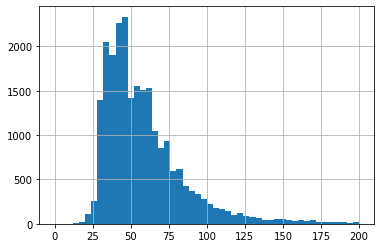

In [58]:
main_statistic('total_area',50, 200)

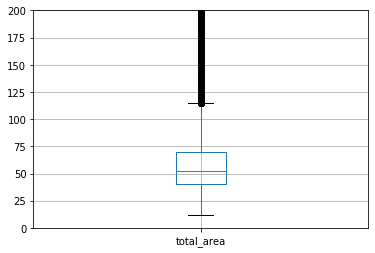

In [61]:
# "Ящик с усами", ограниченный, для наглядности верхней границей в 200 м.кв.
plt.ylim(0, 200)
realty_data.boxplot('total_area')

#### Площадь. Выводы.

- большой разброс значений (от 12 до 900 м.кв.)
- высокое значение стандартного отклонения
- минимальное занчение (12 м.кв.) вполне имеет "право на жизнь", ибо Питер известен массовостью бывших "коммуналок"
- большая часть данных в диапазоне до 70 м.кв., что вполне коррелирует с реальностью
- массовые выбросы начинаются со значения в 112 м.кв.


#### Цена.

(count        23,699.0
 mean      6,541,548.8
 std      10,887,013.3
 min          12,190.0
 25%       3,400,000.0
 50%       4,650,000.0
 75%       6,800,000.0
 max     763,000,000.0
 Name: last_price, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f146a61d2d0>)

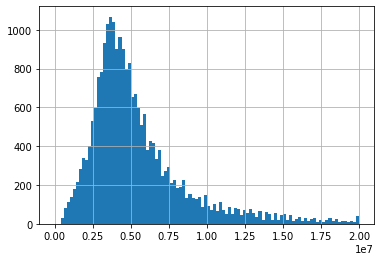

In [62]:
main_statistic('last_price', 100, 20000000)

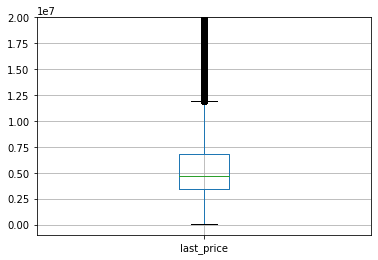

In [65]:
plt.ylim(-1000000, 20000000)
realty_data.boxplot('last_price')

#### Цена. Выводы.

- минимальное значение в 12 900 руб.! Очень похоже на ошибку...
- большая часть значений в диапазоне до 7 млн. руб. Похоже на действительность.
- очень значительный "верхний ус". Значит большое количество либо дорогих, либо многокомнатных предложений.


#### Число комнат.

(count   23,699.0
 mean         2.1
 std          1.1
 min          0.0
 25%          1.0
 50%          2.0
 75%          3.0
 max         19.0
 Name: rooms, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1466d38f90>)

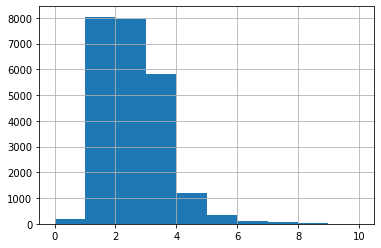

In [66]:
main_statistic('rooms', 10, 10)

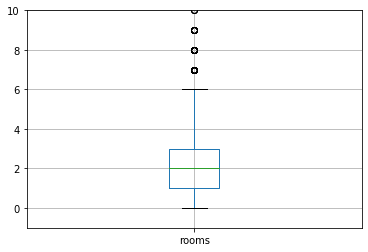

In [69]:
plt.ylim(-1, 10)
realty_data.boxplot('rooms')

#### Число комнат. Выводы.

- самый массовый сегмент предложений - 1,2,3 -комнатные. Объективно.
- аномальные значения в виде 0 комнат
- выбросы начинаются с показателя в 6 комнат

#### Высота потолков.

(count   23,699.0
 mean         2.1
 std          1.1
 min          0.0
 25%          1.0
 50%          2.0
 75%          3.0
 max         19.0
 Name: rooms, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f14668ee710>)

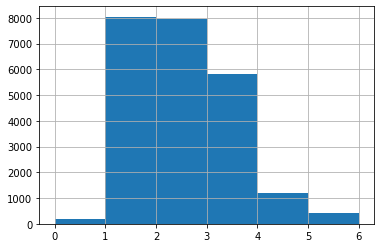

In [70]:
main_statistic('rooms', 6, 6)

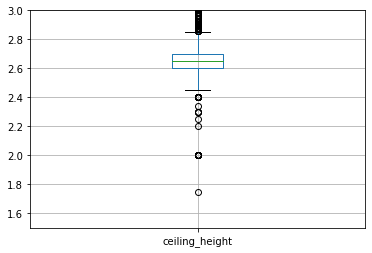

In [73]:
plt.ylim(1.5, 3)
realty_data.boxplot('ceiling_height')

#### Высота потолков. Выводы.

- среднее значение в районе 2,7 м. Вполне согласуется со строительными нормами и подтверждается наличием экстремумов в районах 2.45 м, 2,6 м, 2.85 м.
- есть аномальные выбросы  в нижнем "усе" и еще большее число в верхнем
- максимальное и минимальные значения скорее всего являются ошибками ввиду своей объективной невозможности

### 4.2 Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Посмотрим на статистику и построим гистограмму и "ящик":

In [74]:
realty_data['days_exposition'].describe()

count   23,699.0
mean       169.4
std        206.5
min          1.0
25%         45.0
50%         95.0
75%        199.0
max      1,580.0
Name: days_exposition, dtype: float64

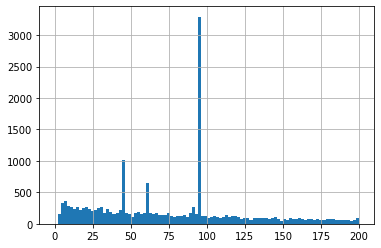

In [75]:
realty_data['days_exposition'].hist(bins = 100, range = (0, 200))

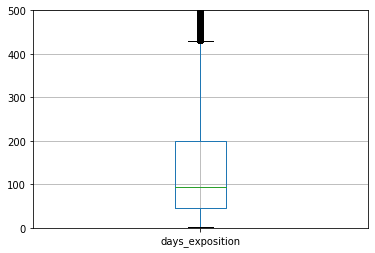

In [76]:
plt.ylim(0, 500)
realty_data.boxplot('days_exposition')

### 4.2 Выводы.

- обычно продажа занимает около 100 дней (медиана = 95). Вообще 3-й месяц является наиболее "эффективным" по продажам.
- около половины всех сделок осуществляется в первые 3 месяца, а абсолютное большинство в течении 450 дней
- можно считать что квартира продалась быстро, если она была продана в течении первых 45 дней (нижняя граница "ящика")
- квартира продается необычайно долго, если продажа занимает более 450 дней (конец верхнего "уса")

### 4.3 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Для решения задач, в рамках текущего проекта, необходимо проработать, на предмет отсутствия аномалий, следующие данные:

- `total_area`
- `days_exposition`
- `city_сenters_nearest`
- `ceiling_height`
- `last_price`
- `rooms`

Приступим.

#### Площадь.

Оценим долю очень больших объектов.

In [77]:
print('Доля сверхбольших площадей:', len(realty_data.query('total_area > 250')) / len(realty_data))

Доля сверхбольших площадей: 0.004725937803282839


Мизерная доля. Можем убирать.

In [78]:
realty_data = realty_data.query('total_area < 250')

Проверим распределение и статистику.

In [79]:
realty_data['total_area'].describe()

count   23,583.0
mean        59.0
std         28.8
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        249.9
Name: total_area, dtype: float64

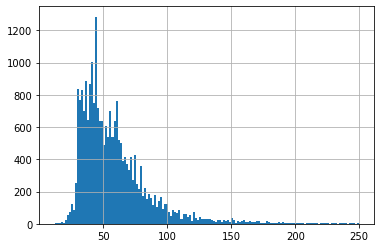

In [80]:
realty_data['total_area'].hist(bins = 150)

##### Площадь. Выводы.

Убрали сделки со сверхбольшими площадями (более 250 м. кв.) без ущерба для распределения.

#### Количество дней продажи.

Оценим долю сверхдолгих и сверхбыстрых сделок.

In [81]:
# Определим сверхбыстрые как сделка в менее чем 4 дня
print('Доля сверхбыстрых сделок:', len(realty_data.query('days_exposition < 4')) / len(realty_data))
# Определим сверхдолгие как сделка в более чем 1100 дней
print('Доля сверхдолгих сделок:', len(realty_data.query('days_exposition > 1100')) / len(realty_data))

Доля сверхбыстрых сделок: 0.006869355043887546
Доля сверхдолгих сделок: 0.00682695161769071


Менее процента в обоих случаях - избавляемся.

In [82]:
realty_data = realty_data.query('4 <= days_exposition < 1100')

Проверим распределение и статистику.

In [83]:
realty_data['days_exposition'].describe()

count   23,259.0
mean       162.5
std        185.9
min          4.0
25%         46.0
50%         95.0
75%        195.0
max      1,099.0
Name: days_exposition, dtype: float64

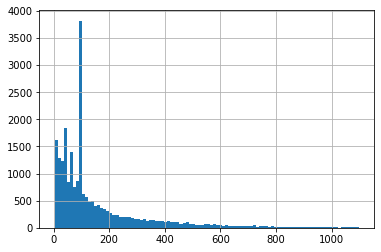

In [84]:
realty_data['days_exposition'].hist(bins = 100)

#### Количество дней продажи. Выводы.

Убраны сверхбыстрые (менее 4 дней) и сверхдолгие (более 1 100 дней) сделки, составлявшие менее 1 процента выборки каждый. Качество распределения на должном уровне.

#### Близость к центру города.

In [85]:
realty_data['cityCenters_nearest'].describe()

count   23,259.0
mean    11,492.5
std      9,632.4
min          0.0
25%      3,801.0
50%     11,763.0
75%     15,726.5
max     65,952.0
Name: cityCenters_nearest, dtype: float64

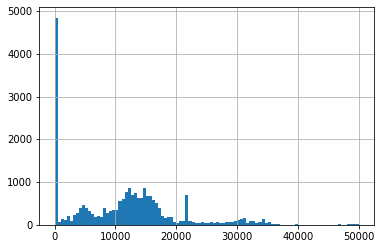

In [86]:
realty_data['cityCenters_nearest'].hist(bins = 100, range = (0, 50000))

#### Близость к центру города. Выводы.

По большому счету аномалий, требующих удаления в этих данных нет, так как пик нулевых значений образовался после того как мы сами заменили пропуски на ноль, а другие пики отражают объявления в более крупных городах. Тем не менее, в дальнейшем необходимо учесть большое количество оставленных нами нулевых значений.

#### Высота потолков.

In [87]:
realty_data['ceiling_height'].describe()

count   23,259.0
mean         2.7
std          1.0
min          1.0
25%          2.6
50%          2.6
75%          2.7
max        100.0
Name: ceiling_height, dtype: float64

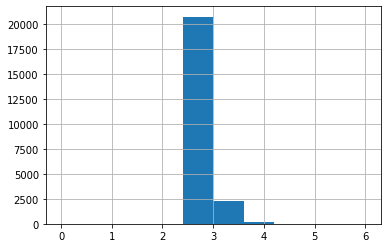

In [88]:
realty_data['ceiling_height'].hist(range = (0, 6))

Оценим долю сверхнизких (< 2 м)и свервысоких потолков (> 4,5 м):

In [89]:
print('Доля сверхнизких потолков:', len(realty_data.query('ceiling_height < 2')) / len(realty_data))
print('Доля сверхвысоких потолков:', len(realty_data.query('ceiling_height > 4.5')) / len(realty_data))

Доля сверхнизких потолков: 0.00012898232942086933
Доля сверхвысоких потолков: 0.0015907820628573886


Доля мала. Удаляем.

In [90]:
realty_data = realty_data.query('2 <= ceiling_height <= 4.5')

Проверяем:

In [91]:
realty_data['ceiling_height'].describe()

count   23,219.0
mean         2.7
std          0.2
min          2.0
25%          2.6
50%          2.6
75%          2.7
max          4.5
Name: ceiling_height, dtype: float64

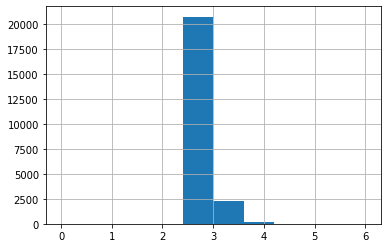

In [92]:
realty_data['ceiling_height'].hist(range = (0, 6))

#### Высота потолков. Выводы.

Избавились от аномальных значений высоты потолка. Значительно улучшили показатель стандартного отклонения, без потерь в распределении.

#### Цена

In [93]:
realty_data['last_price'].describe()

count        23,219.0
mean      6,167,080.7
std       6,982,913.7
min          12,190.0
25%       3,400,000.0
50%       4,600,000.0
75%       6,700,000.0
max     330,000,000.0
Name: last_price, dtype: float64

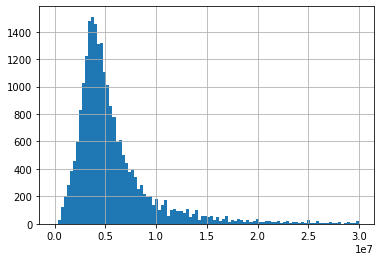

In [94]:
realty_data['last_price'].hist(bins = 100, range = (0,30000000))

Оценим долю супердешевых и супердорогих сделок:

In [95]:
# Ограничим дешевые сделки порогом в 100 тыс. руб. (более дешево вряд ли можно приобрести даже в глухой деревне)
print('Доля сверхдешевых сделок:', len(realty_data.query('last_price < 100000')) / len(realty_data))
# Ограничим дорогие сделки порогом в 30 млн. руб. Более чем внушительная сумма для подавляющего большинства населения.
print('Доля сверхдорогих сделок:', len(realty_data.query('last_price > 30000000')) / len(realty_data))

Доля сверхдешевых сделок: 4.306817692407081e-05
Доля сверхдорогих сделок: 0.009690339807915931


Доля обеих категорий менее процента. Удаляем.

In [96]:
realty_data = realty_data.query('100000 <= last_price <= 30000000')

Проверяем:

In [97]:
realty_data['last_price'].describe()

count       22,993.0
mean     5,705,863.6
std      3,966,971.1
min        430,000.0
25%      3,400,000.0
50%      4,600,000.0
75%      6,600,000.0
max     30,000,000.0
Name: last_price, dtype: float64

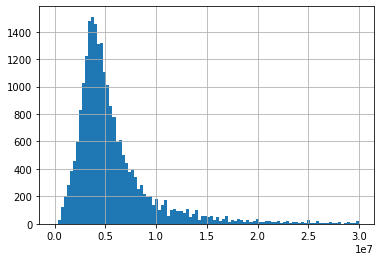

In [98]:
realty_data['last_price'].hist(bins = 100, range = (0,30000000))

#### Цена. Выводы.

Ограничили ценовой диапазон сделок в пределах от 100 тыс. руб. до 30 млн. руб.,убрав аномально низкие и высокие показатели, при этом сократив стандартное отклонение и не нарушив рапределение.

#### Количество комнат.

In [99]:
realty_data['rooms'].describe()

count   22,993.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         14.0
Name: rooms, dtype: float64

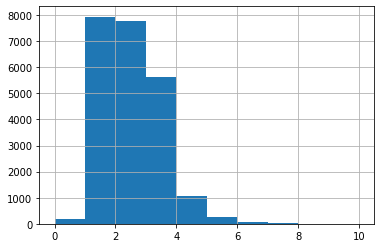

In [100]:
realty_data['rooms'].hist(range = (0, 10))

Оценим долю объявлений с количеством комнат более 6 и менее 1:

In [101]:
print('Доля объявлений с более чем 6 комнатами:', len(realty_data.query('rooms > 6')) / len(realty_data))
# Ограничим дорогие сделки порогом в 30 млн. руб. Более чем внушительная сумма для подавляющего большинства населения.
print('Доля объявлений с менее чем 1 комнатой:', len(realty_data.query('rooms < 1')) / len(realty_data))

Доля объявлений с более чем 6 комнатами: 0.0019571173835515156
Доля объявлений с менее чем 1 комнатой: 0.008263384508328623


Доли малы, можно пренебречь. Удаляем.

In [102]:
realty_data = realty_data.query('1 <= rooms <= 6')

Проверим:

In [103]:
realty_data['rooms'].describe()

count   22,758.0
mean         2.0
std          1.0
min          1.0
25%          1.0
50%          2.0
75%          3.0
max          6.0
Name: rooms, dtype: float64

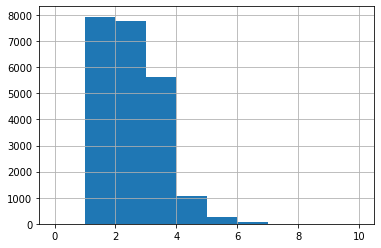

In [104]:
realty_data['rooms'].hist(range = (0, 10))

#### Количество комнат. Выводы.

Удалили нулевые значения и значения больше 6 комнат. Это никак не повлияло на показатели распределения.

### 4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Предварительно оценим корреляции всех интересующих нас параметров.

In [138]:
(realty_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'floor', 'exposition_weekday', 'exposition_month', 'exposition_year']].corr()
            ['last_price']
            .to_frame()
            .sort_values('last_price', ascending=False)
            .style.background_gradient(cmap='Greens')
)

,last_price
last_price,1
total_area,0.786392
rooms,0.495746
floor,0.0863115
exposition_month,0.0032645
exposition_weekday,-0.0194377
exposition_year,-0.0253139
cityCenters_nearest,-0.0334724


Наиболее весомыми является прямое влияние на стоимость таких параметров как **площадь** и **количество комнат**.

#### Корреляция цена объекта - квадратный метр (площадь).

Рассчитаем коэфициент Пирсона:

In [107]:
print('Коэфициент Пирсона (цена/площадь):', realty_data['last_price'].corr(realty_data['total_area']))

Коэфициент Пирсона (цена/площадь): 0.7863924984291869


Построим график корреляции:

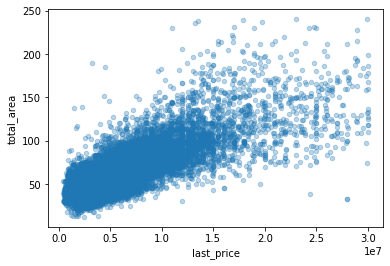

In [108]:
realty_data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

#### Корреляция цена объекта - количество комнат.

In [109]:
print('Коэфициент Пирсона (цена/кол-во комнат):', realty_data['last_price'].corr(realty_data['rooms']))

Коэфициент Пирсона (цена/кол-во комнат): 0.495745622746687


Построим график, отражающий зависимость средней стоимости недвижимости от количества комнат.

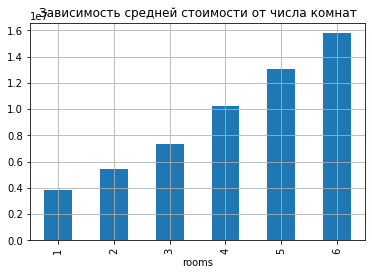

In [111]:
realty_data.groupby('rooms')['last_price'].mean().plot(kind='bar', title = 'Зависимость средней стоимости от числа комнат', grid = True)

#### Корреляция цена объекта - удаленность от центра.

In [112]:
print('Коэфициент Пирсона (цена/удаленность от центра):', realty_data['last_price'].corr(realty_data['cityCenters_nearest']))

Коэфициент Пирсона (цена/удаленность от центра): -0.033472447480773354


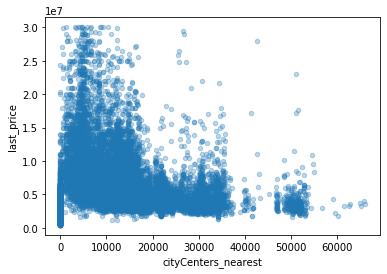

In [113]:
realty_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

#### Корреляция цена объекта - тип этажа.

In [114]:
print('Коэффициент Пирсона для последних этажей:',realty_data['last_price'].corr(realty_data.query('floor_type == "последний"')['floor']))
print('Коэффициент Пирсона для других этажей:',realty_data['last_price'].corr(realty_data.query('floor_type == "другой"')['floor']))
print('Коэффициент Пирсона для первых этажей:',realty_data['last_price'].corr(realty_data.query('floor_type == "первый"')['floor']))

Коэффициент Пирсона для последних этажей: 0.12537762831225494
Коэффициент Пирсона для других этажей: 0.03526972628777514
Коэффициент Пирсона для первых этажей: nan


Для первых этажей невозможно посчитать коэфициент Пирсона в связи с тем, что стандартное отклонение равно 0 из-за единственного значения (1) в категории. Оценим эту категорию по графику.

Построим график, отражающий зависимость средней стоимости недвижимости от типа этажа.

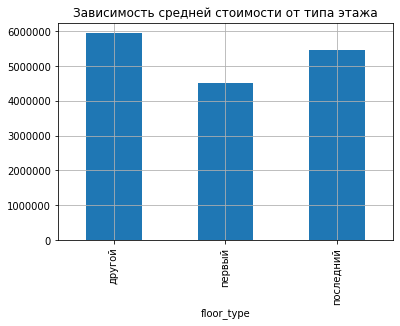

In [116]:
realty_data.groupby('floor_type')['last_price'].mean().plot(kind='bar', title = 'Зависимость средней стоимости от типа этажа', grid = True)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


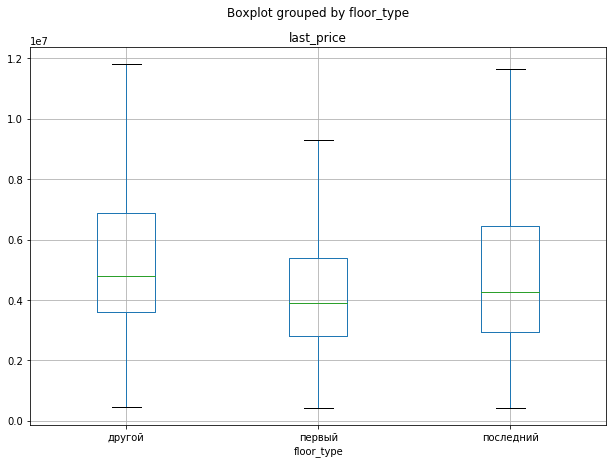

In [119]:
### или так

realty_data.boxplot('last_price', by='floor_type', showfliers=False, figsize=(10,7))

#### Корреляция цена объекта - дата размещения (день. месяц, год).

In [120]:
realty_data[['exposition_weekday', 'exposition_month', 'exposition_year', 'last_price']].corr()

,exposition_weekday,exposition_month,exposition_year,last_price
exposition_weekday,1.0,0.0,-0.0,-0.0
exposition_month,0.0,1.0,-0.3,0.0
exposition_year,-0.0,-0.3,1.0,-0.0
last_price,-0.0,0.0,-0.0,1.0


### 4.4 Выводы

- Корреляция **цена объекта - квадратный метр (площадь)** -  имеет место **сильно выраженная корреляция**, коэффициент Пирсона = 0,78
- Корреляция **цена объекта - количество комнат** - **корреляция ниже среднего**, коэффициент Пирсона = 0,49
- Корреляция **цена объекта - удаленность от центра** -  **корреляция слабая**, коэффициент Пирсона = -0,33. Наибольшая плотность распределения в зоне непосредственной близости к центру населенного пункта.
- Корреляция **цена объекта - тип этажа** - **корреляция практически отсутствует**, коэффициенты Пирсона = около 0. Для первых этажей невозможно посчитать коэфициент Пирсона в связи с тем, что стандартное отклонение равно 0 из-за единственного значения (1) в категории. По графику можно отметить, что для первого этажа наибольшая плотность объявлений - в дешевом сегменте.
- Корреляция **цена объекта - дата размещения (день. месяц, год)** - **корреляция отсутствует**, коэффициенты Пирсона в районе 0

### 4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

#### ТОП-10 населенных пунктов (по количеству объявлений)

In [121]:
top_10_cities = realty_data['locality_name'].value_counts().head(10)
top_10_cities

Санкт-Петербург      14969
поселок Мурино         522
поселок Шушары         432
Всеволожск             390
Пушкин                 362
Колпино                332
поселок Парголово      317
Гатчина                303
деревня Кудрово        281
Выборг                 235
Name: locality_name, dtype: int64

Для нахождения самых дорогих и самых дешевых населенных пунктов, построим доп. таблицу:

In [122]:
top_cities_names = list(top_10_cities.index)
top_cities_names

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

#### ТОП и АНТИТОП населенных пунктов по стоимости жилья (за м. кв.)

In [123]:
(realty_data.query('locality_name in @top_cities_names')
            .pivot_table(index = 'locality_name', values = 'sqm_price')
            .sort_values('sqm_price', ascending = False)
)

,sqm_price
locality_name,
Санкт-Петербург,"110,470.8"
Пушкин,"103,196.7"
деревня Кудрово,"92,205.7"
поселок Парголово,"90,308.1"
поселок Мурино,"85,005.4"
поселок Шушары,"78,428.2"
Колпино,"75,382.6"
Гатчина,"68,747.0"
Всеволожск,"68,638.3"


### 4.5 Выводы.

- лидеры по стоимости квадратного метра - **Санкт-Петербург, Пушкин, деревня Кудрово** (видимо престижная деревня...)
- самый дешевый "метр" в **Выборге, Всеволжске и Гатчине**

### 4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [124]:
# Создаем таблицу по Санкт-Петебургу
spb_realty_data = pd.DataFrame(realty_data.loc[realty_data['locality_name'] == "Санкт-Петербург"])
# Добавляем столбец с расстоянием в километрах
spb_realty_data['cityCenters_nearest_km'] = spb_realty_data['cityCenters_nearest'] / 1000
# Округляем и меняем тип на int
spb_realty_data['cityCenters_nearest_km'] = spb_realty_data['cityCenters_nearest_km'].round(0).astype('int')
# Построим сводную таблицу со средней стоимостью километра
spb_km_price = spb_realty_data.pivot_table(index='cityCenters_nearest_km', values="last_price")
spb_km_price


,last_price
cityCenters_nearest_km,
0,"11,318,666.7"
1,"11,554,223.6"
2,"11,041,364.7"
3,"9,597,743.3"
4,"10,273,090.7"
5,"10,724,339.0"
6,"9,575,309.9"
7,"9,307,976.0"
8,"8,777,713.1"


Для наглядности построим график:

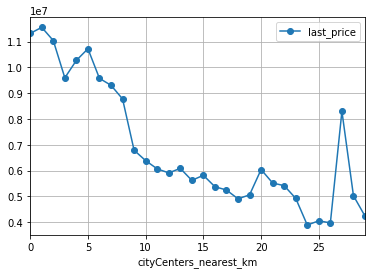

In [125]:
(pd.DataFrame(spb_km_price.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')
            .to_records())
            .plot(x='cityCenters_nearest_km', y = 'last_price', style='o-', grid = True)
 )

### 4.6  Вывод.

Наиболее резкое падение в цене наблюдается начиная с 9-го километра. Таким образом центральной зоной Санкт-Петербурга можно считать окружность радиусом **8 километров**.

### 4.7  Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [126]:
# Выделяем квартиры центрального района
spb_center = spb_realty_data.query('cityCenters_nearest_km <= 8')

#### Анализируем площадь

In [127]:
spb_center['total_area'].describe()

count   3,666.0
mean       79.2
std        35.2
min        12.0
25%        53.0
50%        72.2
75%        97.0
max       240.0
Name: total_area, dtype: float64

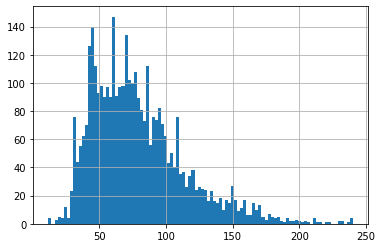

In [128]:
spb_center['total_area'].hist(bins = 100)

- основная масса предложений в центральном районе СПб - квартиры площадью около 70 м. кв. Но есть предложения и со значительно большей площадью , до 240 м. кв. (длинный правый хвост графика)

#### Анализируем цены

In [129]:
spb_center['last_price'].describe()

count        3,666.0
mean    10,006,328.8
std      5,431,983.7
min      1,686,000.0
25%      6,253,500.0
50%      8,500,000.0
75%     12,100,000.0
max     30,000,000.0
Name: last_price, dtype: float64

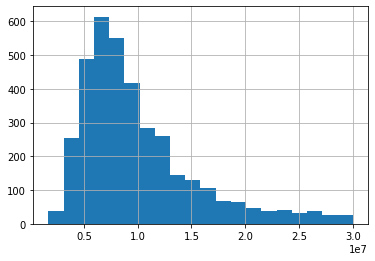

In [130]:
spb_center['last_price'].hist(bins = 20)

 - средняя цена в центральном районе - 10 млн.руб.
 - основная масса объявлений в центральном районе - недвижимость стоимостью от 5,4 до 8,5 млн. руб. (50% от всей выборки центрального района)

#### Анализируем число комнат

In [131]:
spb_center['rooms'].describe()

count   3,666.0
mean        2.6
std         1.1
min         1.0
25%         2.0
50%         2.0
75%         3.0
max         6.0
Name: rooms, dtype: float64

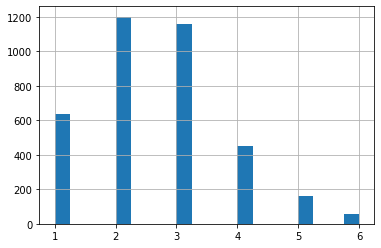

In [132]:
spb_center['rooms'].hist(bins = 20)

- основная масса предложений - 2-х и 3-хкомнатные
- также стоит отметить в центральном районе значительно меньшую долю 1-комнатных квартир, относительно всей выборки в целом

#### Анализируем высоту потолков

In [133]:
spb_center['ceiling_height'].describe()

count   3,666.0
mean        2.9
std         0.3
min         2.0
25%         2.6
50%         2.8
75%         3.1
max         4.5
Name: ceiling_height, dtype: float64

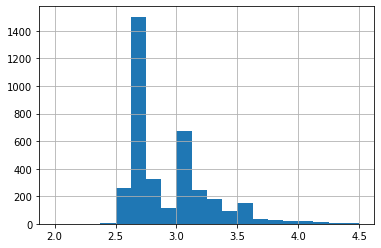

In [134]:
spb_center['ceiling_height'].hist(bins = 20)

- средняя высота потолков - 2,9 м. Соответствует стандартам.
- в целом ситуация с потолками в центральном районе мало чем отличается от общей выборки

#### Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [135]:
# Центр Санкт-Петербурга
(spb_center[['last_price', 'total_area', 'ceiling_height', 'rooms', 'floor', 'cityCenters_nearest', 'exposition_weekday', 'exposition_month','exposition_year']]
             .corr()['last_price']
             .to_frame()
             .sort_values('last_price', ascending=False)
             .style.background_gradient(cmap='Greens')
)

,last_price
last_price,1
total_area,0.738669
rooms,0.45641
ceiling_height,0.208307
floor,0.170851
exposition_year,-0.0130258
exposition_weekday,-0.0300267
exposition_month,-0.0317988
cityCenters_nearest,-0.11612


In [136]:
# Вся выборка
(realty_data[['last_price', 'total_area', 'ceiling_height', 'rooms', 'floor', 'cityCenters_nearest', 'exposition_weekday', 'exposition_month','exposition_year']]
             .corr()['last_price']
             .to_frame()
             .sort_values('last_price', ascending=False)
             .style.background_gradient(cmap='Greens')
)

,last_price
last_price,1
total_area,0.786392
rooms,0.495746
ceiling_height,0.420279
floor,0.0863115
exposition_month,0.0032645
exposition_weekday,-0.0194377
exposition_year,-0.0253139
cityCenters_nearest,-0.0334724


 - самым значимым из, из исследуемых, показателей в СПб, влияющим на стоимость является **количество комнат**. Но его влияние все таки достаточно посредственное, учитывая корреляцию равную **0,5**. Аналогичную степень влияния этот показатель оказывает и в целом по всей выборке.
 - прочие показатели практически не влияют на стоимость.

## Шаг 5. Общий вывод

В рамках исследования была проанализирована база объявлений в объеме 23 699 записей по 364 населенным пунктам Ленинградской области.
Выборка представляет собой базу объявлений о продаже объектов недвижимости за, почти, петилетний период (27.11.2014 - 03.05.2019)   
Основная масса объявлений (66% )всех объявлений приходятся на квартиры Санкт-Петербурга.


В процессе исследования, с целью определения степени влияния на стоимость, были изучены следующие параметры объектов недвижимости и объявлений:

- `total_area` - площадь квартиры
- `rooms` - количество комнат
- `ceiling_height` - высота потолков
- `floor` - этаж объекта недвижимости
- `cityCenters_nearest` - удаленность объекта недвижимости от центра населенного пункта
- `days_exposition` - срок размещения объявления**

и получены следующие результаты:

**площадь квартиры**

- Оказывает максимальное влияние на стоимость объекта недвижимости как в целом по выборке, так и отдельно в Санкт-Петербурге. Коэфициенты Пирсона: **0,8** и **0,7** соответственно.Выборка имеет значительный разброс по площади  - от 12 до 900 м. кв.

**количество комнат**

- Это второй по значимости, относительно влияния на стоимость, фактор. Как в целом по выборке, так и в Санкт-Петербурге коэфициент Пирсона равен **0,5**.Наибольшее число объявлений находится в сегменте 1,2-хкомнатных квартир. Но стоит отметить, что в центральном районе Санкт-Петербурга (удаленность от центра <= 8 км.) основная масса предложений сконцентрирована на 2,3-хкомнатных.


**высота потолков**

- Третий по значимости фактор. Коэфициент Пирсона равен **0,4**, а значит его влияние слабо различимо. В центральном районе Санкт-Петербурга он еще ниже и равен **0,2** (ради проживания в центре люди готовы "мириться" с любой высотой потолков). Имеются характерные пиковые значения (2,7 и 3 м.), объясняющиеся массовостью типовой застройки.


**этаж**

- Этаж на котором расположена квартира не оказывает влияния на стоимость квартиры, хотя в центре Санкт-Петербурга этому придают чуть большее значение (коэфициенты Пирсона **0,1** и **0,2** соответствено).


**удаленность от центра**

- Удаленность от центра не имеет значимого влияния на стоимость, т.к. коэфициент Пирсона в районе **0**.

**срок размещения объявления**

- Корреляции со стоимостью не обнаружено. Около половины всех сделок осуществляется в первые 3 месяца, а абсолютное большинство в течении 450 дней.



**Дополнительная информация.**

В ходе работы с исходными данными обнаружены значительные объемы отсутствующих данных, даже в достаточно важных для сквозной аналитики полях, а именно:

- сроки размещения объявления
- жилая площадь
- наименование населенного пункта 
- высота потолков

В случае со сроками размещения объявления - это явная техническая проблема на стороне сервиса, требующая внимания и устранения.
В остальных случаях рекомендуется сделать поля обязательными для указания в объявлении.

Благодарю за внимание.